# **Поиск минимального остовного дерева (алгоритм Крускала)**

## Теория

***Взвешенный граф*** – это граф, каждому ребру которого поставлено некоторое значение, называемое весом.

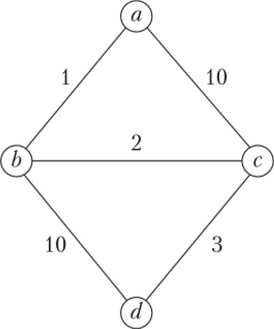



---


**Что же является минимальным остовным деревом? И как вообще граф связан с деревом?**

Разберемся.


---



Граф является ***деревом*** тогда и только тогда, когда любые две различные его вершины можно соединить единственной простой цепью.
***Дерево***, вообще, – это связный граф, не содержащий циклов.


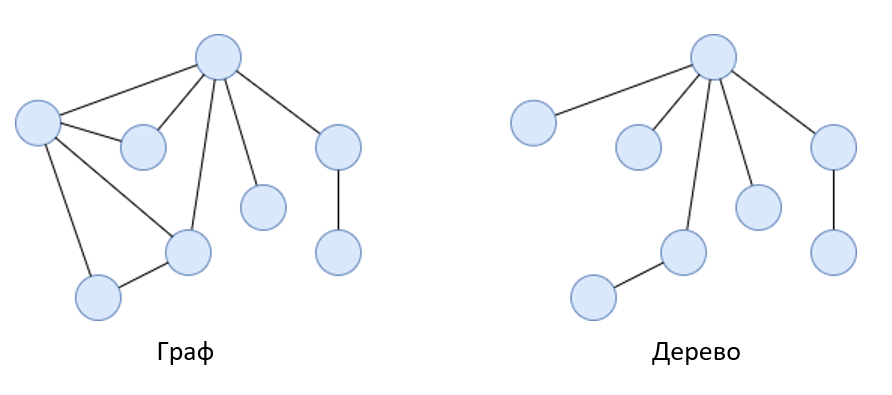



---


С этим разобрались, идем дальше. Теперь нужно понять, что такое остовные деревья, и для чего они применяются.


---


***Остовным деревом*** (spanning tree) связного графа G=(V,E) называется подмножество ребер множества E, которые создают дерево, содержащее все вершины V. 


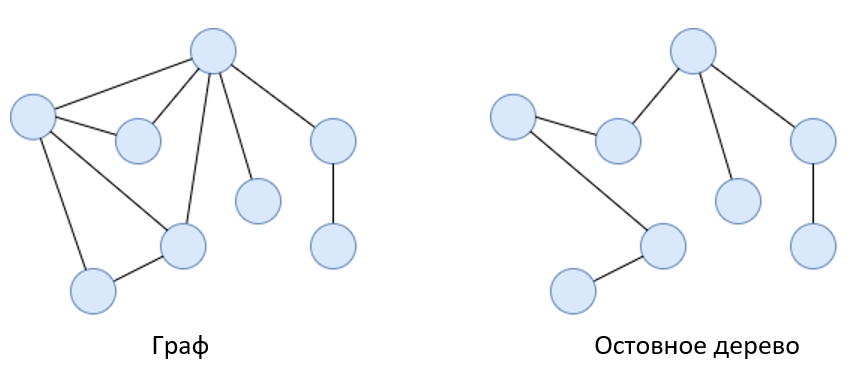

В случае взвешенных графов особый интерес представляют минимальные остовные деревья, то есть остовные деревья с минимальной суммой весов ребер.

***Минимальные остовные деревья*** позволяют решить задачу, в которой требуется соединить множество точек (представляющих, например, города, дома и другие объекты) наименьшим объемом дорожного полотна, проводов, труб и прочее.

Любое дерево и так является возможным связным графом с наименьшим количеством ребер, но минимальное остовное дерево является наименьшим связным графом по весу ребер.


## Алгоритм Крускала

***Алгоритм Крускала*** для построения минимального остовного дерева (применим для неориентированных графов) наращивает связные компоненты вершин, создавая в конечном счете полное минимальное остовное дерево. Первоначально каждая вершина является отдельным компонентом будущего дерева. Алгоритм последовательно ищет ребро для добавления в остов путем поиска самого легкого ребра среди всех ребер, соединяющих два дерева в лесу. При этом выполняется проверка, не находятся ли обе вершины-кандидаты в уже существующем остове. Если вершины находятся  в остове, то ребро отбрасывается, поскольку его добавление привело бы к созданию цикла.

Алгоритм Крускала, подобно и алгаритму Прима, является жадным. Это значит, что на каждом этапе выбирается лучшее локальное решение из всех возможных вариантов, не принимая во внимание глобальную структуру. 



---


**Идея алгоритма Крускала:**

1. Ребра графа сортируются в порядке возрастания весов. 
2. Для каждого ребра, начиная с первого, проверяем соединяет ли оно две несвязные вершины, если да, то его можно включить в остовное дерево. Также включаем ребра, которые соединяют отдельно стоящие деревья, с условием,что они не образуют циклы.
3. Продолжаем повторять шаг 2, пока мы не получим минимальное остовное дерево.


---





## Примеры
R = список ребер графа (длина, вершина 1, вершина 2)

**Красным** выделены узлы и ребра, входящие в остов.

**Галочкой** отмечены ребра, которые включены в остов. 

**Крестиком** отмечены ребра, которые не включены в остов. 

**Серым прямоугольником** отмечен этап (ребро из упорядоченного R), на котором мы находимся. 

**Зеленым закрашенным прямоугольником** отмечен выходной остов.

---

<br/>

### Пример 1
R = [(5, 1, 2), (3, 1, 3), (4, 2, 3)]

Ответ: [(3, 1, 3), (4, 2, 3)]
(Cost = 7)




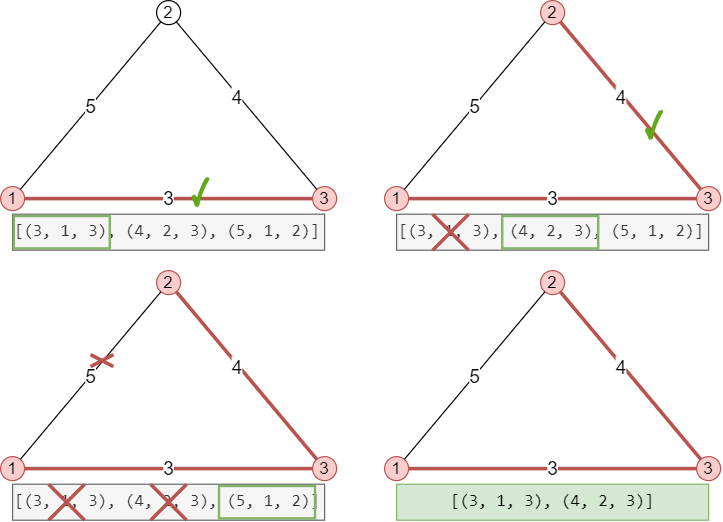







---
<br/>

### Пример 2

R = [(4, 1, 2), (7, 1, 4), (10, 2, 3), (8, 2, 5), (9, 3, 5), (5, 4, 5)]

Ответ: [(4, 1, 2), (5, 4, 5), (7, 1, 4), (9, 3, 5)] (Cost = 25)


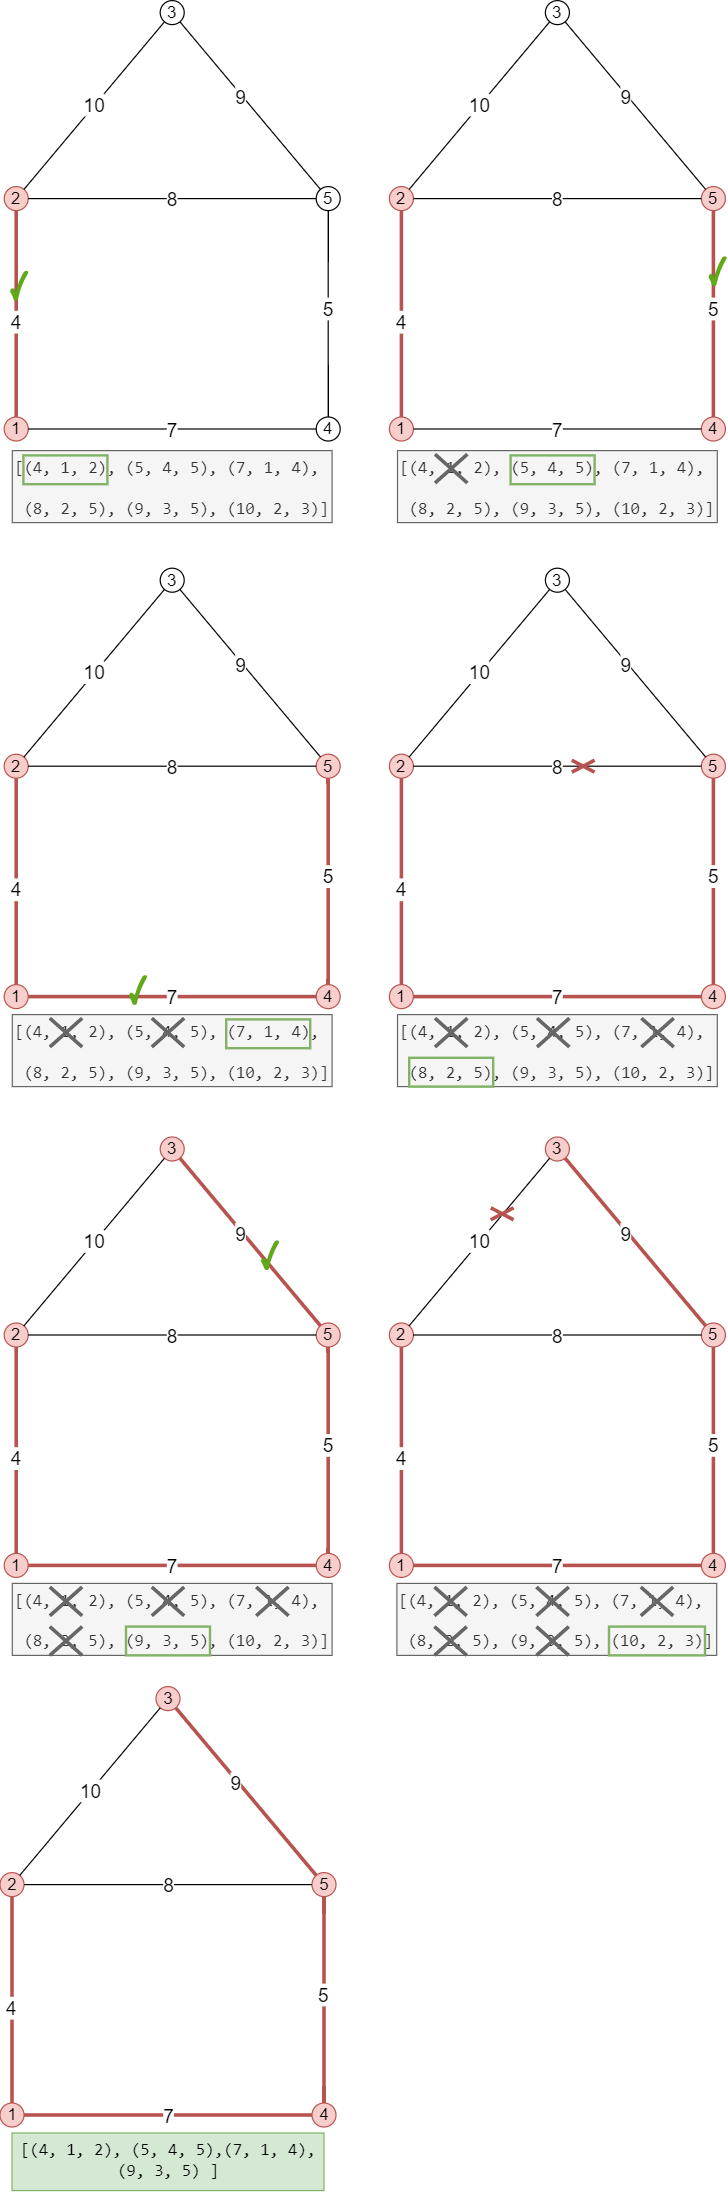




## Реализация

In [ ]:
# Алгоритм Крускала поиска минимального остова графа

# функция построения отдельных деревьев (добавление их в остов)
def building_forest(Rs, MST, cost, D, temp):
    for r in Rs:  # цикл по всем ребрам
        if r[1] not in D.keys() or r[2] not in D.keys():  # проверка для исключения циклов в остове

            # подготовительный этап для формирования D
            if r[1] not in D.keys() and r[2] not in D.keys():  # если обе вершины не соединены, то
                D[r[1]] = D[r[2]] = [r[1],
                                     r[2]]  # формируем в словаре D ключи этих вершин и их связности

            else:
                if not D.get(r[1]):  # если в словаре нет первой вершины, то
                    D[r[2]].append(r[1])  # добавляем ее в список для второй вершины
                    D[r[1]] = D[r[2]]  # а также добавляем первую вершину в ключ словаря
                else:
                    D[r[1]].append(r[2])  # иначе, все то же самое делаем со второй вершиной
                    D[r[2]] = D[r[1]]

            # основной этап включения вершин в остов
            MST.append(r)  # добавляем ребро в остов
            cost = cost + r[0]  # наращиваем общую стоимость остова

        # заходим сюда, когда есть вероятность получить цикл (обе вершины уже есть в словаре D)
        else:
            # добавляем во временную переменную значение r
            temp.append(r)

    return MST, cost, D, temp


# функция слияния отдельных деревьев (добавление их в остов)
def merging_tree(MST, cost, D, temp):
    for r_temp in temp:  # проходим по опасным ребрам (temp) и объединяем разрозненные группы вершин
        if r_temp[2] not in D[r_temp[1]]:  # если вершины принадлежат разным группам, то объединяем
            MST.append(r_temp)  # добавляем ребро в остов
            cost = cost + r_temp[0]  # наращиваем общую стоимость остова
            D[r_temp[1]] += D[r_temp[2]]  # объединем списки двух групп вершин
            D[r_temp[2]] += D[r_temp[1]]
    return MST, cost


def alg_kruskal():
    # список ребер графа (длина, вершина 1, вершина 2)
    # R = [(4, 1, 2), (7, 1, 4), (10, 2, 3), (8, 2, 5), (9, 3, 5), (5, 4, 5)]
    R = [(13, 1, 2), (18, 1, 3), (17, 1, 4), (15, 1, 5), (21, 1, 6),
         (26, 2, 3), (19, 2, 5), (30, 3, 4), (22, 4, 6)]
    Rs = sorted(R, key=lambda x: x[0])

    MST = []  # список ребер остова
    cost = 0  # общая стоимость
    temp = []  # список "опасных" ребер, которые могут привести к образованию циклов
    D = {}  # словарь изолированных групп вершин (вершины, которые были включены в остов)

    # добавление в остов отдельных деревьев
    MST, cost, D, temp = building_forest(Rs, MST, cost, D, temp)
    # слияние отдельных деревьев в остове
    MST, cost = merging_tree(MST, cost, D, temp)
    print(MST, cost)


alg_kruskal()

[(13, 1, 2), (15, 1, 5), (17, 1, 4), (18, 1, 3), (21, 1, 6)] 84



### Логика алгоритма следующая:


1.Проходим по отсортированному списку ребер и вершин. В функции building_forest() включаем в остов ребра по следующим правилам:

```
if r[1] not in D.keys() or r[2] not in D.keys()
```

То есть, включаем в остов, если хотя бы одна вершина не включена еще в него.
При включении ребра в остов, обзательно заполняем D (словарь изолированных групп вершин (вершины, которые были включены в остов)).

<br/>

2.Значение D на этапах выполнения в функции building_forest():

```
1.   на 1 итерации (13, 1, 2): {1: [1, 2], 2: [1, 2]}
2.   на 2 итерации (15, 1, 5): {1: [1, 2, 5], 2: [1, 2, 5], 5: [1, 2, 5]}
3.   на 3 итерации (17, 1, 4): {1: [1, 2, 5, 4], 2: [1, 2, 5, 4], 5: [1, 2, 5, 4], 4: [1, 2, 5, 4]} 
и т.д.
``` 

<br/>

3.Если же условие из 1 шага не выполняется, то добавляем ребро в переменную temp, которая содержит в себе так называемые "опасные" ребра. Это ребра, которые могут образовывать циклы.

Значение temp после всех этапов выполнения в функции building_forest():

    [(19, 2, 5), (22, 4, 6), (26, 2, 3), (30, 3, 4)]

<br/>

4.Далее вызываем функцию merging_tree(), в которой будет проходить обработка переменной temp по слиянию разрозненных деревьев.

Например, начнем с ребра (19, 2, 5). Проверяем, входит ли вершина 5 в список связанных вершин относительно вершины 2. То есть, проверяем может ли образоваться цикл по следующим правилам:

    if r_temp[2] not in D[r_temp[1]]
В словаре D = {1: [1, 2, 5, 4], 2: [1, 2, 5, 4], 5: [1, 2, 5, 4], 4: [1, 2, 5, 4]}, по ключу 2 получаем значение [1, 2, 5, 4], где есть узел 5, значит мы рассматриваемое ребро не включаем в остов, так как его добавление приведет к образованию цикла 2-1-5-2.

И так далее проходим по всем элементам temp. 

<br/>

5.Получаем готовый остов.

<br/>

**Графический пример выполнения алгоритма**


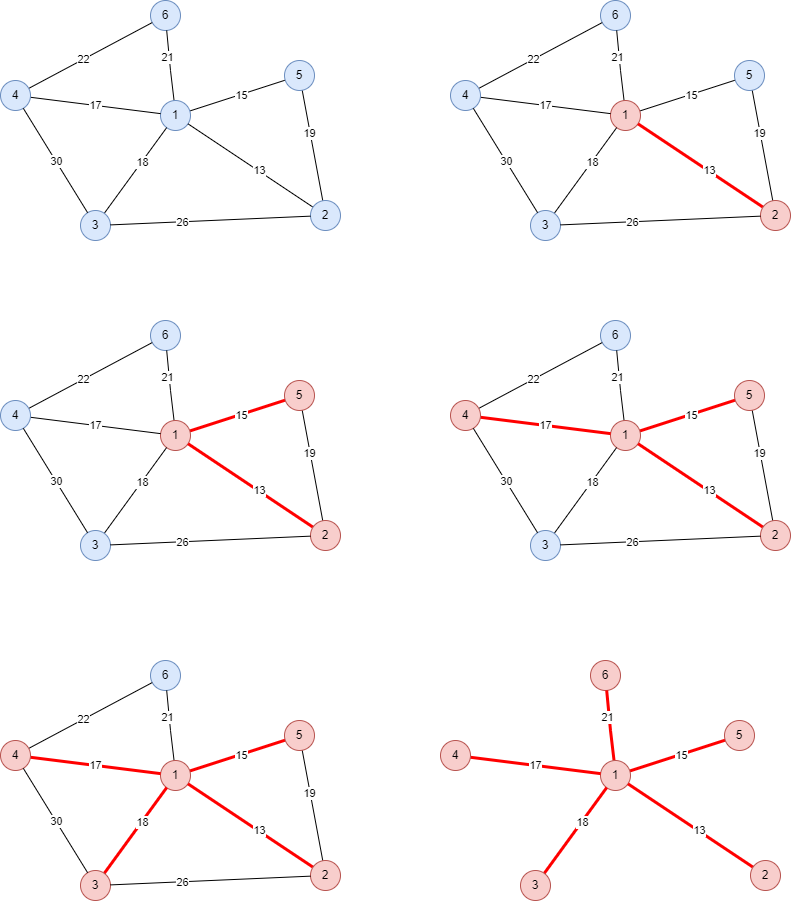



## Производительность


Сложность сортировки составляет O(N log N). Сложность выполнения функций building_forest и merging_tree в общем случае составляет O(N + N) = O(N).

Общая сложность составляет O(N log N + N) = O(N log N).


Скорость вычислений для настоящего примера составляет 20-28 ms на LeetCode.



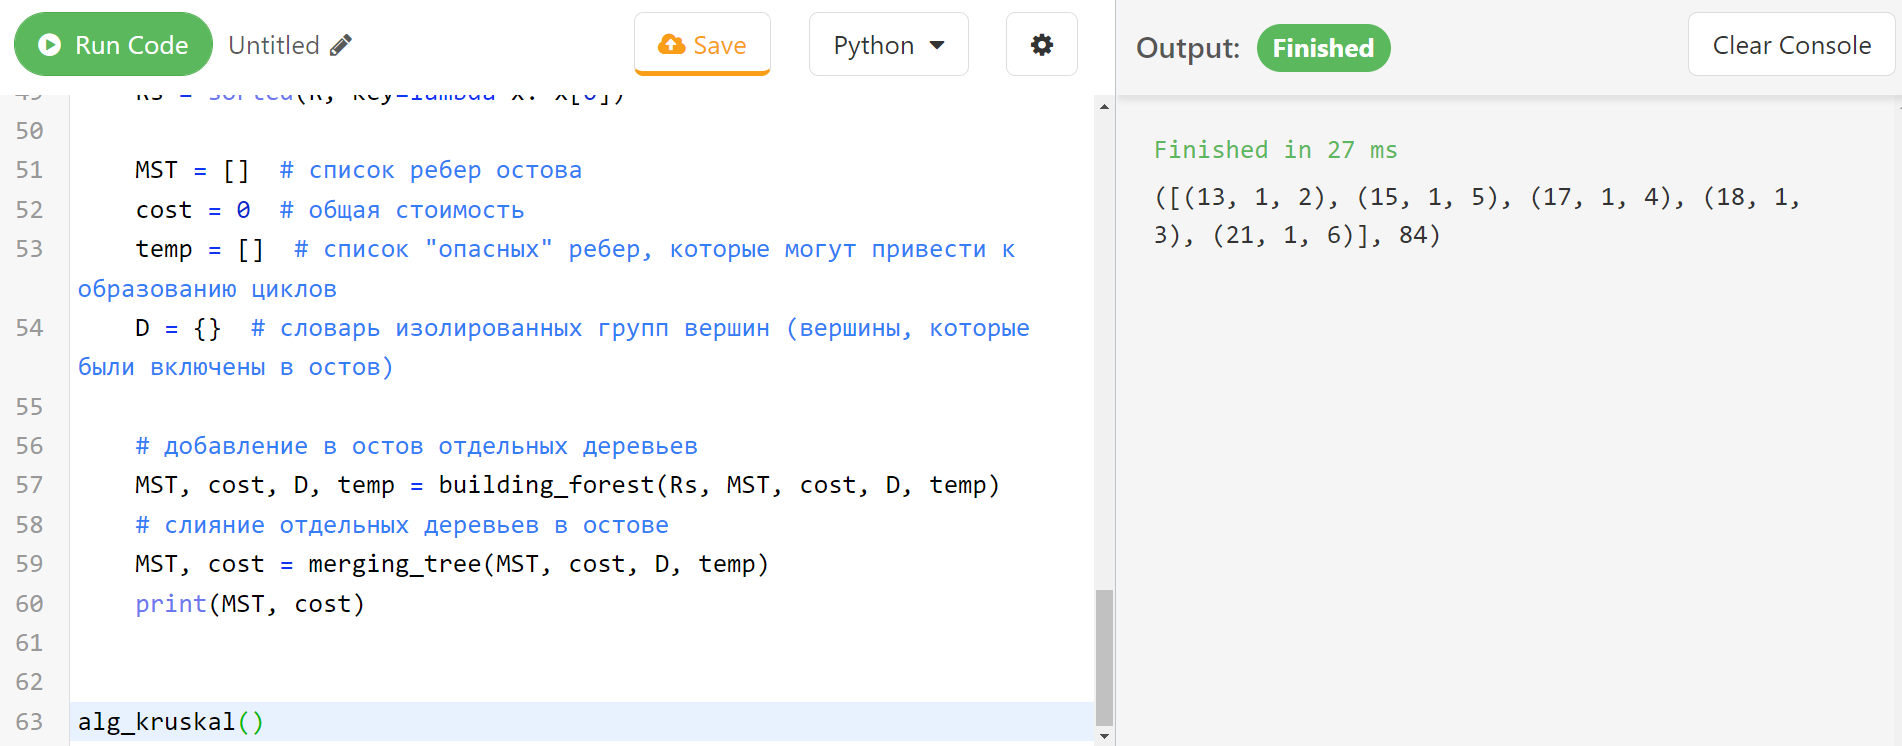

